# Lab #2A
___

**Task:** Train a Perceptron with Rosenblatt's algorithm
          for given dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from perceptron import Perceptron
from misc.estimators import accuracy, contingency_table, precision, recall

## Dataset reading and describing
___

_Dataset is given in lab task_

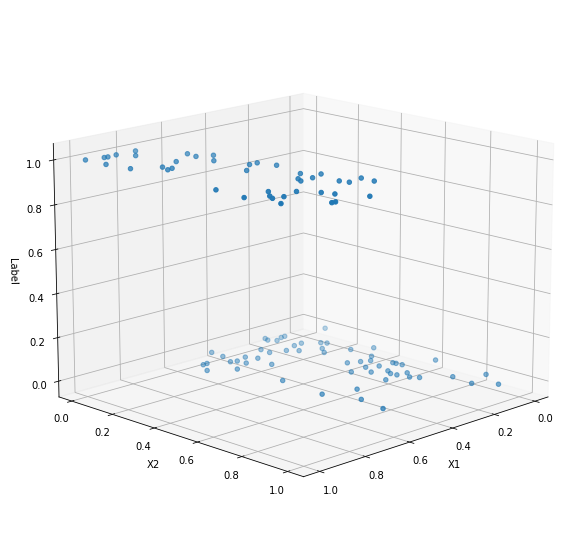

In [2]:
data = pd.read_csv("datasets/data10.csv", sep=";", header=None).to_numpy()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection="3d")
ax.view_init(elev=15, azim=45)
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("Label")

ax.scatter(data[:, 0], data[:, 1], data[:, 2])

## Dividing dataset on train and test data
___

Let's shuffle given data and divide it on train and test data in a ratio 4:1:

In [3]:
np.random.seed(3)
np.random.shuffle(data)

X, Y = data[:, :-1], data[:, -1]

train_percentage = .8
train_number = int(len(data) * train_percentage)

X_train, Y_train = X[:train_number], Y[:train_number]
X_test, Y_test = X[train_number:], Y[train_number:]

## Perceptron initialization and train

In [4]:
p = Perceptron()
p.train(X_train, Y_train, .9)
p.w, p.b

(array([2.85693914, 0.01408861]), -1.403336225398137)

## Estimations

In [5]:
predictions = p.predict(X_test)

#### Contingency matrix:

In [6]:
contingency_table(Y_test, predictions)

array([[8, 0],
       [4, 8]])

#### Accuracy, precision, recall:

In [7]:
print(f"Accuracy: {accuracy(Y_test, predictions).round(2)}\n"
      f"Precision: {precision(Y_test, predictions).round(2)}\n"
      f"Recall: {recall(Y_test, predictions).round(2)}")

Accuracy: 0.8
Precision: 0.67
Recall: 1.0
